Analysis of the Parisian market from 2017 to 2019 and prediction for 2022

First step: Import the data into the notebook and perform transformations on the variables.

In [1]:
#We import the libraries that we will use to process the data and visualize them
import pandas as pd, numpy as np
import os


In [ ]:
#We import the data into a dataframe
Chemin ="C:\\Users\\Python\\Modele_Prediction\\"

#Set option to display values without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Recover data from real estate transaction history
df_historique = pd.read_excel(Chemin + "historique_immobilier_paris_2017_2021_vdef2.xlsx")

#Retrieve portfolio data to predict
df_portefeuille = pd.read_excel(Chemin + "portefeuille_actifs.xlsx")


In [ ]:
#identify types of goods
print("On observe qu'il y a {} types de biens".format(df_portefeuille['type_local'].unique().shape[0]),"\n")

#Recover useful data in a dataframe
df_bien = df_portefeuille[['type_local','code_type_local']]

#Removal of duplicate data
df_bien = df_bien.drop_duplicates(subset=['type_local', 'code_type_local'])

#Loop to display the retrieved data
print("Et leurs codes types sont : ")
for row in df_bien.head()[['type_local', 'code_type_local']].iterrows():
    print("*", row[1][0], "(", row[1][1], ")")
    


In [5]:
#We check the number of transactions we have in our dataframe
print('le nombre de transactions dans les données est ?')
print(df_historique.shape[0])

#Number of transactions for loans
print('le nombre de transactions pour les appartements dans les données est ?')
df_appartements =df_historique.loc[df_historique['type_local'] == 'Appartement']
print(df_appartements.shape[0])

#Number of transactions for commercial premises
print('le nombre de transactions pour les locaux commerciaux dans les données est ?')
df_Local_industriel =df_historique.loc[df_historique['type_local'] == 'Local industriel. commercial ou assimilé']
print(df_Local_industriel.shape[0])

le nombre de transactions dans les données est ?
26196
le nombre de transactions pour les appartements dans les données est ?
24353
le nombre de transactions pour les locaux commerciaux dans les données est ?
1843


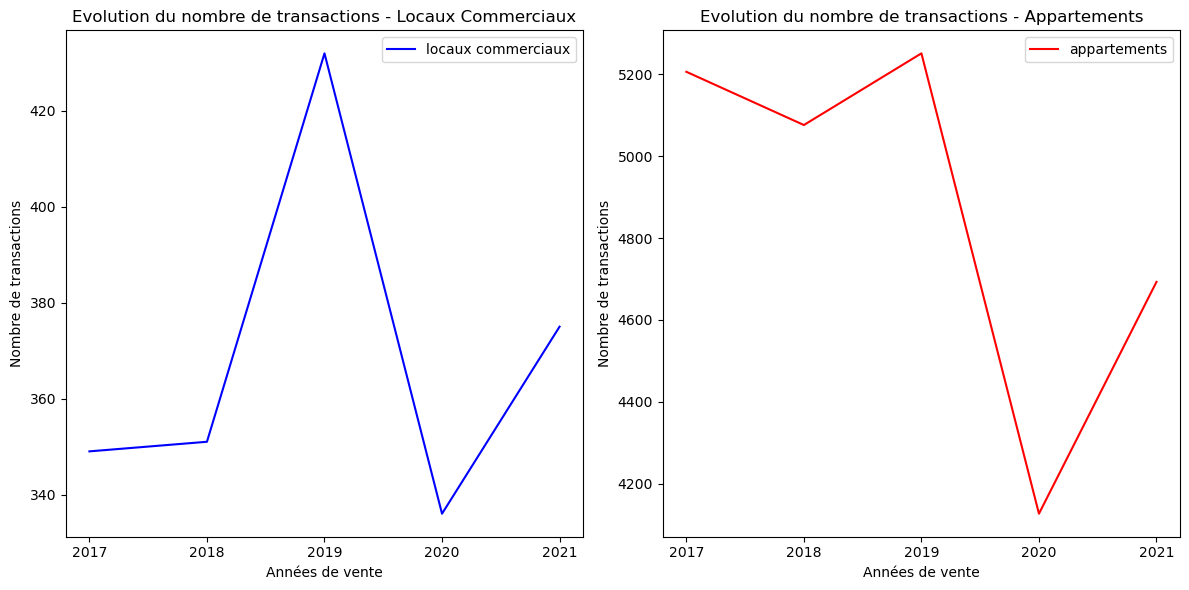

In [6]:
# display the evolution of the number of transactions per year
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker


# Sort data by 'local_type' then by 'mutation_date'
df_historique_sorted = df_historique.sort_values(by=['type_local', 'date_mutation'])

# Filter data for each local_type
df_locaux_commerciaux2 = df_historique_sorted[df_historique_sorted['type_local'] == 'Local industriel. commercial ou assimilé']
df_appartements2 = df_historique_sorted[df_historique_sorted['type_local'] == 'Appartement']

# Create a copy of the filtered DataFrames
df_locaux_commerciaux2 = df_locaux_commerciaux2.copy()
df_appartements2 = df_appartements2.copy()

# Add the 'year' column
df_locaux_commerciaux2['annee'] = pd.to_datetime(df_locaux_commerciaux2['date_mutation']).dt.year
df_appartements2['annee'] = pd.to_datetime(df_appartements2['date_mutation']).dt.year

# Convert 'Year' to string
df_locaux_commerciaux2['annee'] = df_locaux_commerciaux2['annee'].astype('str')
df_appartements2['annee'] = df_appartements2['annee'].astype('str')

# Grouping by year and counting of transactions
df_locaux_commerciaux_transactions = df_locaux_commerciaux2.groupby('annee').size().reset_index(name='nombre_transactions')
df_appartements_transactions = df_appartements2.groupby('annee').size().reset_index(name='nombre_transactions')

# Removing missing values
df_locaux_commerciaux_transactions_clean = df_locaux_commerciaux_transactions.dropna()
df_appartements_transactions_clean = df_appartements_transactions.dropna()

# Create graphs for each local_type
plt.figure(figsize=(12, 6))

# Graphic for commercial premises
plt.subplot(1, 2, 1)
plt.plot(df_locaux_commerciaux_transactions_clean['annee'], df_locaux_commerciaux_transactions_clean['nombre_transactions'], label='locaux commerciaux', color='blue')
plt.xlabel('Années de vente')
plt.ylabel('Nombre de transactions')
plt.legend()
plt.title('Evolution du nombre de transactions - Locaux Commerciaux')

# Graphic for apartments
plt.subplot(1, 2, 2)
plt.plot(df_appartements_transactions_clean['annee'], df_appartements_transactions_clean['nombre_transactions'], label='appartements', color='red')
plt.xlabel('Années de vente')
plt.ylabel('Nombre de transactions')
plt.legend()
plt.title('Evolution du nombre de transactions - Appartements')

plt.tight_layout()
plt.show()



In [7]:
#We also check the available history range
print('la première date de transaction dans les données est le ?')
print(df_historique['date_mutation'].min())

print('la dernière date de transaction dans les données est le ?')
print(df_historique['date_mutation'].max())

la première date de transaction dans les données est le ?
2017-01-02 00:00:00
la dernière date de transaction dans les données est le ?
2021-12-31 00:00:00


In [ ]:
#Comparison of properties by creating a price per square meter column.
df_historique['prix_au_metre_carre'] = df_historique.apply(
    lambda row: row['valeur_fonciere'] / row['surface_reelle'], axis=1
)

print(df_historique['prix_au_metre_carre'])

In [ ]:
#Evolution of the price per square meter of apartments in Paris
#We remove the columns which are apparently useless AND we will focus on the apartments initially
df_Appartements=df_historique.loc[df_historique['type_local'] == 'Appartement']
df_Appartements=df_Appartements.drop(columns=['code_type_local', 'adresse_numero', 'adresse_nom_voie',
                                              'nom_commune'])

In [10]:
#Let's prepare a dataframe by grouping the average sales prices of apartments per year with the associated average surface area

df_Appartements_annee = df_Appartements.copy()

# Creation of a year column
# Extract the year of each transaction
df_Appartements_annee.loc[:, 'Annee'] = df_Appartements_annee['date_mutation'].dt.year.astype('int64')

# Convert 'Year' to string
df_Appartements_annee['Annee'] = df_Appartements_annee['Annee'].astype('str')

df_Appartements_annee = df_Appartements_annee.sort_values('Annee')

# Group data by year
df_Appartements_annee_prix_m2 = df_Appartements_annee.groupby('Annee')

# Calculate the average sales price for each group
df_Appartements_annee_prix_m2 = df_Appartements_annee_prix_m2.agg({'prix_au_metre_carre': 'mean'})

# Reset the index to include zipcode' as a column
df_Appartements_annee_prix_m2 = df_Appartements_annee_prix_m2.reset_index()

# Rename the columns
df_Appartements_annee_prix_m2.columns = ['Annee' ,'prix_moyen_au_metre_carre']  


print(df_Appartements_annee_prix_m2.head())

  Annee  prix_moyen_au_metre_carre
0  2017                    9492.86
1  2018                   10031.40
2  2019                   10562.71
3  2020                   10674.87
4  2021                   10455.60


We see on the average sales price of apartments in Paris that the price has increased in relation to the surface area. <br>
We will create a graph to better visualize it.

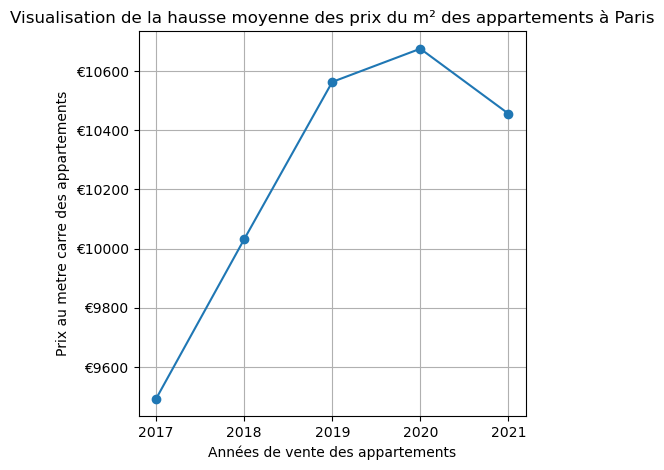

In [11]:
#Creation of a graph to visualize the increase in the average price
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Get years as strings
annees = df_Appartements_annee_prix_m2['Annee']

prix_au_metre_carre = df_Appartements_annee_prix_m2['prix_moyen_au_metre_carre']

plt.figure(figsize=(5, 5))
plt.plot(annees, prix_au_metre_carre, marker='o')
plt.xlabel('Années de vente des appartements')
plt.ylabel('Prix au metre carre des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Visualisation de la hausse moyenne des prix du m² des appartements à Paris')
plt.show()

In [ ]:
Comparison of prices per square meter between districts

In [12]:
#Show the list of postal codes in our data.
print(df_Appartements['code_postal'].unique())


[75003 75008 75001 75006 75005 75007 75010 75009 75011 75012 75013 75014
 75015 75016 75017 75018 75020 75019 75004 75002]


In [13]:
#Let's create a dataframe for a second visualization with the evolution of prices by district
df_code_postal = df_Appartements_annee

df_code_postal = df_code_postal.sort_values('Annee')

# Group data by year and postal code
df_code_postal = df_code_postal.groupby(['Annee', 'code_postal'])

# Calculate the average sales price for each group
df_resultat_code_postal = df_code_postal.agg({'prix_au_metre_carre': 'mean'})

# Reset the index to include zipcode' as a column
df_resultat_code_postal = df_resultat_code_postal.reset_index()

# Rename the columns
df_resultat_code_postal.columns = ['Annee',  'code_postal' ,'prix_moyen_au_metre_carre']  

print(df_resultat_code_postal)

   Annee  code_postal  prix_moyen_au_metre_carre
0   2017        75001                   11762.71
1   2017        75002                   10920.13
2   2017        75003                   11679.82
3   2017        75004                   12407.23
4   2017        75005                   11306.75
..   ...          ...                        ...
95  2021        75016                   10790.31
96  2021        75017                   10372.37
97  2021        75018                    9665.64
98  2021        75019                    8828.59
99  2021        75020                    9114.40

[100 rows x 3 columns]


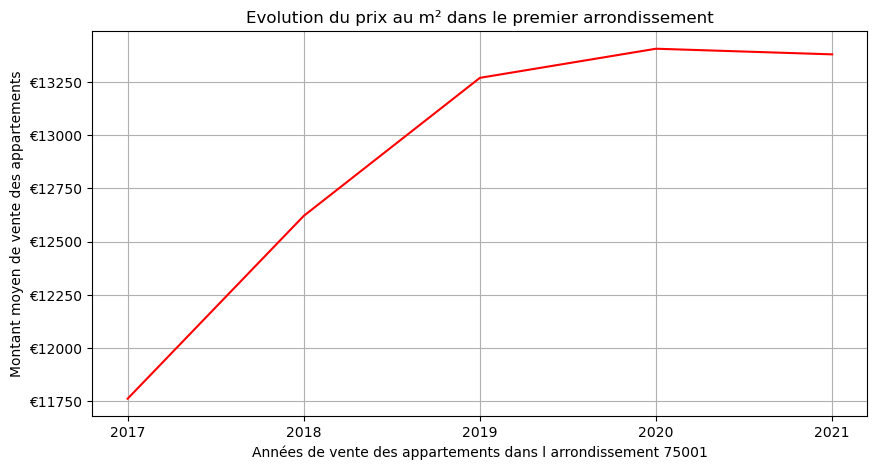

In [14]:
#Creation of a graph to visualize the increase in the average price per square meter in the first arrondissement

# Convert 'Year' into a string and we get them back
annees = df_resultat_code_postal['Annee'].astype('str').unique()

#we only select the data from the first district
df_resultat_arrondissement = df_resultat_code_postal[df_resultat_code_postal['code_postal'] == 75001]

#we recover the average price per m2
prix_moyen_par_m2 = df_resultat_arrondissement['prix_moyen_au_metre_carre']

plt.figure(figsize=(10,5))
plt.plot(annees, prix_moyen_par_m2, color='red')
plt.xlabel('Années de vente des appartements dans l arrondissement 75001')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² dans le premier arrondissement')
plt.show()

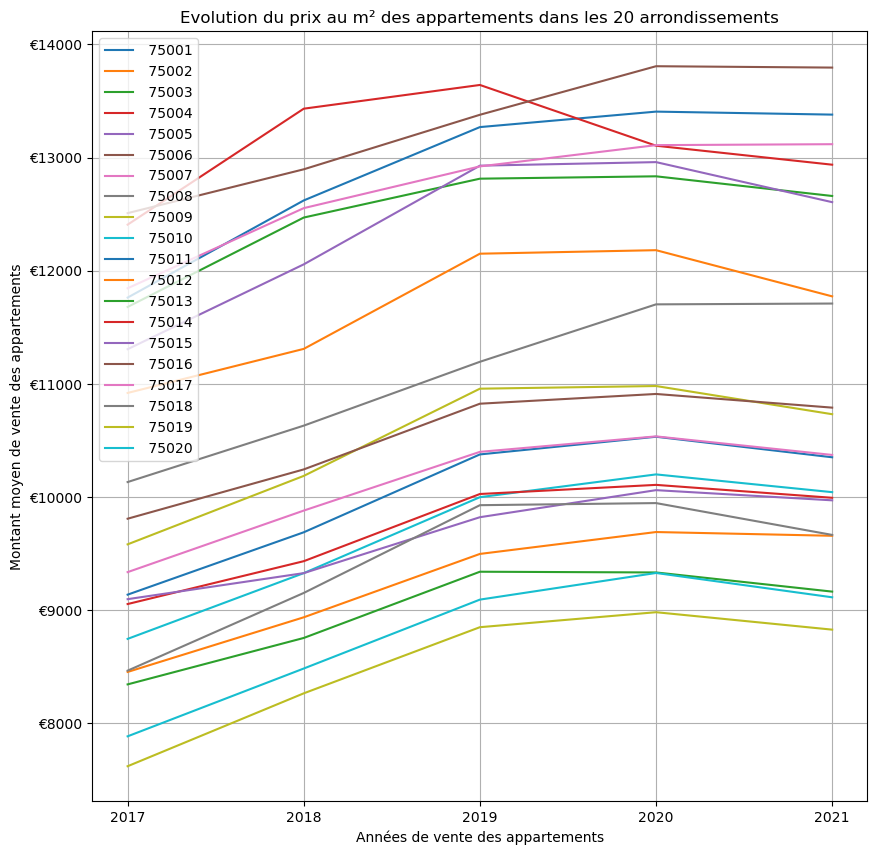

In [15]:
#We display the evolution of the price per m² by district in Paris

df_resultat_arrondissement = df_resultat_code_postal

plt.figure(figsize=(10,10))
Annee=df_resultat_arrondissement['Annee'].astype('str').unique()

#Insert the lines to draw below

for arrondissement in df_resultat_arrondissement['code_postal'].unique():
    # Filter the DataFrame by district
    df_arrondissement = df_resultat_arrondissement[df_resultat_arrondissement['code_postal'] == arrondissement]
    
    # Plot data for current district
    plt.plot(Annee, df_arrondissement['prix_moyen_au_metre_carre'], label=f' {arrondissement}')

plt.xlabel('Années de vente des appartements')
plt.ylabel('Montant moyen de vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution du prix au m² des appartements dans les 20 arrondissements')
plt.legend(loc='upper left')
plt.show()

Average prices in all districts increased from 2017 to 2019.
Then from 2019 to 2020 they all practically stagnated or even increased very slightly to finally experience a decrease in the price per m² between 2020 and 2021. Perhaps the result of the pandemic.
But in all cases, the value of property increased between 2017 and 2021.

In [16]:
#the number of transactions in the 6th.
df_transactions = df_Appartements[df_Appartements['code_postal']==75006].count()

print("Le nombre de transactions dans le 6ème est de: {}".format(df_transactions[0]),"\n") 

print("Le nombre de transactions dans les arrondissement sont de:")
df_groupe = df_Appartements.groupby("code_postal")
nombre_de_lignes = df_groupe.size()
print(nombre_de_lignes)


Le nombre de transactions dans le 6ème est de: 709 

Le nombre de transactions dans les arrondissement sont de:
code_postal
75001     409
75002     666
75003     784
75004     548
75005     829
75006     709
75007     607
75008     628
75009     969
75010    1227
75011    1932
75012    1036
75013     870
75014    1248
75015    2308
75016    1947
75017    2212
75018    2805
75019    1091
75020    1528
dtype: int64


The number of transactions in the 6th is below the average total transactions which is 1218.
This low number is probably due to the high price per m². 55 apartments out of the 709 have a price per m² greater than 14,000 Euros.

In [17]:
#Let's display the transaction history to visualize the dispersion of data:
df_nombre_appartements = df_Appartements[(df_Appartements['code_postal'] == 75006) & (df_Appartements['prix_au_metre_carre'] >= 14000)].shape[0]
print("Le nombre de transactions dans le 6ème dont le prix moyen au m² est > 14000 Euros est de: {}".format(df_nombre_appartements)) 

print(df_Appartements[df_Appartements['prix_au_metre_carre'] >= 14000])

Le nombre de transactions dans le 6ème dont le prix moyen au m² est > 14000 Euros est de: 55
      date_mutation  valeur_fonciere  code_postal   type_local  \
11945    2019-12-30        350382.87        75006  Appartement   
17024    2020-01-27       2665398.34        75006  Appartement   
17032    2020-02-05        855962.15        75006  Appartement   
17045    2020-02-21       1207340.28        75006  Appartement   
17049    2020-02-14        645652.35        75006  Appartement   
17067    2020-03-19        674404.93        75006  Appartement   
17080    2020-04-23        168776.42        75006  Appartement   
17083    2020-04-28        253202.18        75006  Appartement   
17087    2020-04-30        703381.10        75006  Appartement   
17126    2020-06-18        253585.10        75006  Appartement   
17127    2020-06-08        943620.61        75006  Appartement   
17154    2020-06-30        563722.66        75006  Appartement   
17162    2020-06-30        887863.19        75006

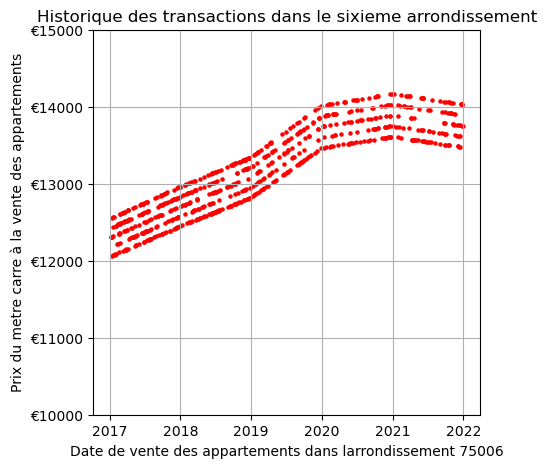

In [18]:
#Evolution of the amount of transactions in the 6th arrondissement

cp=75006

df_arrondissement = df_Appartements[df_Appartements['code_postal']==75006]
df_arrondissement = df_arrondissement.assign(
    prix_au_metre_carre=lambda x: x['valeur_fonciere'] / x['surface_reelle']
    )

plt.figure(figsize=(5,5))
#Insert the scatter plot below

plt.scatter(df_arrondissement['date_mutation'], df_arrondissement['prix_au_metre_carre'], c='red', alpha=1, s=5)

plt.xlabel('Date de vente des appartements dans larrondissement 75006')
plt.ylabel('Prix du metre carre à la vente des appartements')
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.ylim(10000,15000)
plt.grid(which='both')
plt.title('Historique des transactions dans le sixieme arrondissement')
plt.show()

Prices vary consistently over time. There don't appear to be any outliers. We maintain that the evolution of the price per m² tends in 2022 between 13,500 and 14,000 Euros.

To reassure ourselves about the relationship between the data we will use a statistical correlation test.

In [19]:
#Calculate the Spearman correlation to check the relationship between the price per m² and the date
from scipy import stats
from scipy.stats import pearsonr

df_arrondissement_annee = df_arrondissement

# Convert 'Year' into a string and we get them back
df_arrondissement_annee['Annee'] = df_arrondissement.loc[:,'date_mutation'].astype('datetime64[s]').astype('int64') / 10**9

# Create a DataFrame with the two variables
df = pd.DataFrame({'x': df_arrondissement_annee['Annee'], 'y': df_arrondissement_annee['prix_au_metre_carre']})

# Calculate the correlation coefficient and p-value
# The correlation coefficient is a measure of the relationship between two variables
# The p-value is a measure of the probability of obtaining such a high correlation coefficient by chance
corr_coefficient, p_value = pearsonr(df['x'], df['y'])

# Print the correlation coefficient and p-value
print(f"Le coefficient de corrélation est de : {corr_coefficient}")
print(f"avec une pvalue de : {p_value}")

Le coefficient de corrélation est de : 0.903844603149148
avec une pvalue de : 7.108378962572106e-263


The correlation coefficient is close to 1 and suggests a very strong correlation between the variables.
The p-value is very low. This indicates that the results are statistically significant, and there is strong evidence to reject the null hypothesis that there is no correlation.

In [20]:
#Verification of the relationship between land value and surface area
# Create a DataFrame with the two variables
df = pd.DataFrame({'x': df_arrondissement['valeur_fonciere'], 'y': df_arrondissement['surface_reelle']})

# Calculate the correlation coefficient and p-value
# The correlation coefficient is a measure of the relationship between two variables
# The p-value is a measure of the probability of obtaining such a high correlation coefficient by chance
corr_coefficient, p_value = pearsonr(df['x'], df['y'])

## Print the correlation coefficient and p-value
print(f"Le coefficient de corrélation est de : {corr_coefficient}")
print(f"avec une pvalue de : {p_value}")

Le coefficient de corrélation est de : 0.9977572898250295
avec une pvalue de : 0.0


The correlation coefficient is close to 1 and suggests a very strong correlation between the variables.
The p-value is very low. This indicates that the results are statistically significant, and there is strong evidence to reject the null hypothesis that there is no correlation.

In [ ]:
#Analysis of industrial, commercial and similar premises
#We create a dataset which only contains commercial premises
df_locaux_commerciaux=df_historique.loc[df_historique['type_local'] == 'Local industriel. commercial ou assimilé']

In [22]:
#Let's prepare a dataframe by grouping the average prices per square meter of sales by year
df_locaux_commerciaux_annee = df_locaux_commerciaux.copy()

# Convert 'Year' into a string and we get them back
df_locaux_commerciaux_annee['Annee'] = df_locaux_commerciaux_annee['date_mutation'].dt.year.astype('int64')

# Let's prepare a DataFrame by grouping the average prices per square meter of sales by year
df_groupe_locaux_commerciaux_annee = df_locaux_commerciaux_annee.groupby('Annee')['prix_au_metre_carre'].mean().reset_index()

# Rename the columns of the resulting DataFrame
df_groupe_locaux_commerciaux_annee.columns = ['Annee', 'prix_au_metre_carre_moyen']

print(df_groupe_locaux_commerciaux_annee)

   Annee  prix_au_metre_carre_moyen
0   2017                   10949.91
1   2018                   11569.50
2   2019                   11960.13
3   2020                   11966.47
4   2021                   12006.49


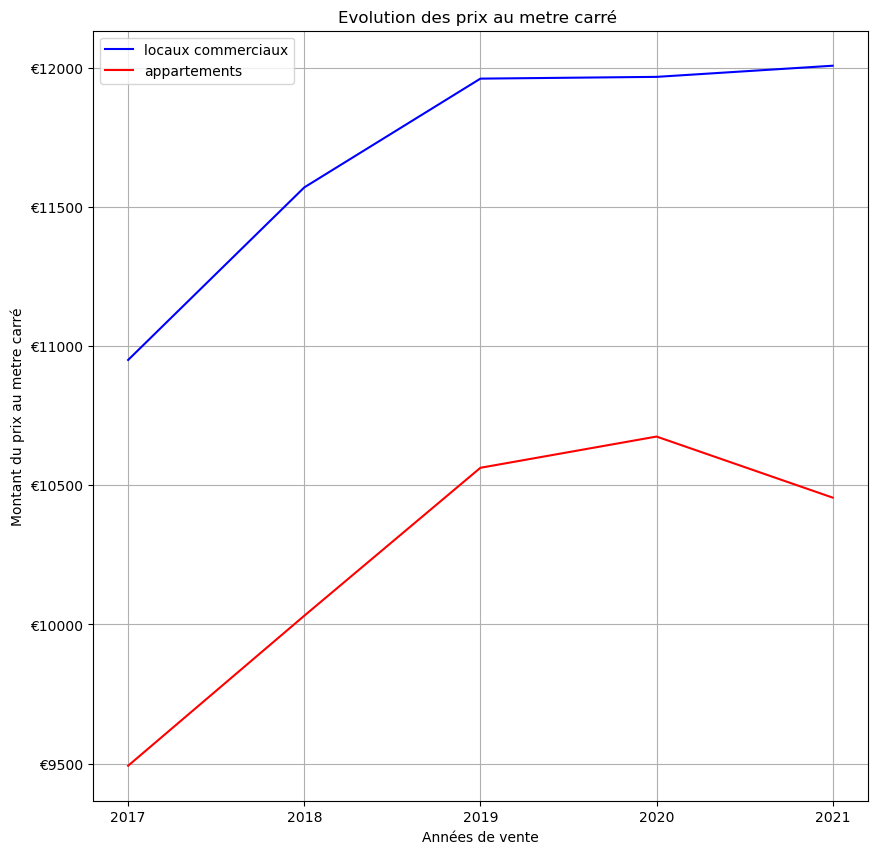

In [23]:
#Creation of a graph to visualize the increase in the average price

# Convert 'Year' to string
df_groupe_locaux_commerciaux_annee['Annee'] = df_groupe_locaux_commerciaux_annee['Annee'].astype('str')

#let's define the variables
annee_locaux_commerciaux = df_groupe_locaux_commerciaux_annee['Annee'].unique()
prix_metre_carre_moyen_locaux_commerciaux = df_groupe_locaux_commerciaux_annee['prix_au_metre_carre_moyen']


# Convert 'Year' into a string and we get them back
df_Appartements['Annee'] = df_Appartements['date_mutation'].dt.year.astype('int64').astype('str')

# Reset the index to include 'Year' as a column
df_Appartements_annee = df_Appartements.reset_index()

# Sorting values by year
df_Appartements_annee = df_Appartements_annee.sort_values('Annee')

# Group the data by year and calculate the average price per square meter
df_Appartements_annee = df_Appartements_annee.groupby('Annee')['prix_au_metre_carre'].mean().reset_index()

# Rename the columns
df_Appartements_annee.columns = ['Annee', 'prix_au_metre_carre_moyen']

# Access the columns of the resulting DataFrame
annee_appartement = df_Appartements_annee['Annee']
prix_metre_carre_moyen_appartement = df_Appartements_annee['prix_au_metre_carre_moyen']

plt.figure(figsize=(10,10))
plt.plot(annee_locaux_commerciaux, prix_metre_carre_moyen_locaux_commerciaux,label='locaux commerciaux',color='blue')
plt.plot(annee_appartement, prix_metre_carre_moyen_appartement,label='appartements',color='red')
plt.xlabel('Années de vente')
plt.ylabel('Montant du prix au metre carré')
plt.legend()
formatter = ticker.FormatStrFormatter('€%d')
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid()
plt.title('Evolution des prix au metre carré ')
plt.show()

Just like apartments, commercial premises increased from 2017 to 2019. Then saw a slight increase from 2019 to 2020 and finally decreased from 2020 and 2021.
But in all cases, the value of commercial premises increased between 2017 and 2021. The price per m² of commercial premises is higher than that of apartments, a difference of 1500 Euros, on average.

In [ ]:
#Training the algorithm to predict the land value of real estate
#Transformation of the categorical columns of the postal code and the type of premises using the one hot encoder (sklearn)

#Step of digitizing data into binary
# Created by adding indicator columns (one-hot encoding) for 'postal_code' and 'local_type'
df_encoded=df_historique.join(pd.get_dummies(df_historique['code_postal']))
df_encoded=df_encoded.join(pd.get_dummies(df_historique['type_local']))

# Converting column 'date_mutation' to integer format ('datetime_int' in seconds)
df_encoded['datetime_int']=df_encoded['date_mutation'].astype('datetime64[s]').astype('int64') / 10**9

# Removed unnecessary columns
df_encoded.drop(['date_mutation', 'code_postal', 'code_type_local', 'type_local','adresse_numero','adresse_nom_voie','nom_commune','prix_au_metre_carre'],axis='columns',inplace=True)

df_encoded.columns

<Axes: title={'center': 'Représentation de la régression linéaire'}, xlabel='surface_reelle', ylabel='valeur_fonciere'>

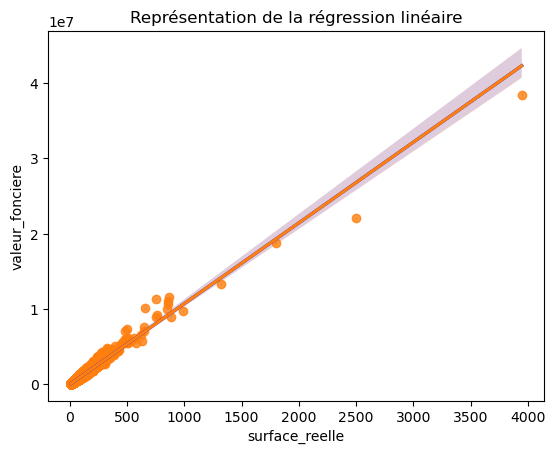

In [25]:
#representation of a simple linear regression between the real surface area of a property and its land value.

import seaborn as sns
X1 = df_historique['surface_reelle']
y1 = df_historique['valeur_fonciere']

# Create a regression chart
sns.regplot(x=X1, y=y1, scatter_kws={'s': 0.1}, line_kws={'color': 'blue'})

X1 = df_historique['surface_reelle']
y1 = df_historique['valeur_fonciere']

plt.title('Représentation de la régression linéaire')

# Create a regression chart
sns.regplot(x=X1, y=y1)


# The pale blue area reflects model uncertainty. The larger it is, the less reliable the regression is.

In [26]:
# We import the split test train from the sklearn library
from sklearn.model_selection import train_test_split
# The value y to find is the land value

# matrix of predictive variables
X = df_encoded.drop(['valeur_fonciere'], axis = 1) # Select useful dimensions
# the vector (array)
y = df_encoded['valeur_fonciere']  # Select the 'land_value' column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=76)



In [27]:
#conversion of data to str
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)



In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score

#We train the algorithm below and make the prediction
# we choose a linear regression model
reg = LinearRegression()

# we train this model on the data with the fit method
reg.fit(X_train, y_train)

y_pred_test = reg.predict(X_test)

# Root Mean Square Error (measure of the accuracy of a predictive model)
# Sensitive to outliers
print(f"Le RMSE est de : {np.sqrt(mean_squared_error(y_test, y_pred_test))}","\n")

# Mean Absolute Percentage Error
# Less sensitive to outliers
print(f"Le MAPE est de : {mean_absolute_percentage_error(y_test, y_pred_test)*100}","\n")

# Calculation of the coefficient of determination
r2 = r2_score(y_test, y_pred_test)
print(f'Le R-squared est de : {r2*100}')


Le RMSE est de : 70465.32882755739 

Le MAPE est de : 8.824616125278178 

Le R-squared est de : 98.12867869447302


Our algorithm therefore makes 8.82% error on average in predicting land value.
The R² is 98.13%, which indicates a good fit of the model to the data.


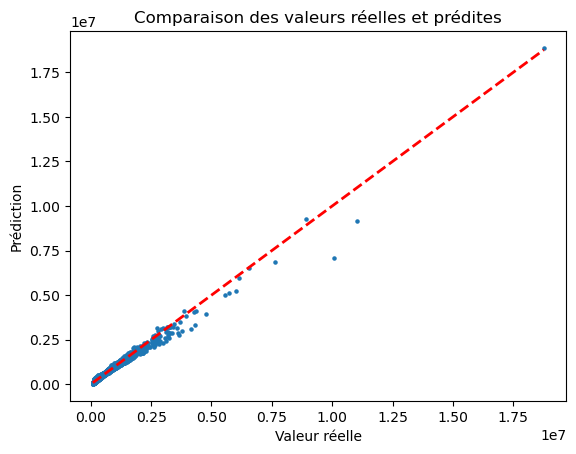

In [30]:
# scatter plot. It represents the comparison of the actual and predicted values of a model.

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_test, s=5)
# Draw the diagonal line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Comparaison des valeurs réelles et prédites')
plt.show()

The blue dots (the actual values) are aligned near the diagonal line (the predicted values), this suggests that the model's predictions are scattered around the reference line, the model is not perfect, but it makes a good estimation of real values.
The deviation between each point and this diagonal line represents the error between the model's prediction and reality.


In [ ]:
#Definitive Portfolio Prediction

#We import the data into a dataframe
df_portefeuille_prediction = df_portefeuille

In [ ]:
#To make a prediction, we need to put this file in the same format as the dataframe we used when training the algorithm.

#We reuse the same functions to do one hot encoding of categorical variables
from sklearn.preprocessing import OneHotEncoder

# Created by adding indicator columns (one-hot encoding) for 'postal_code' and 'local_type'
df_encoded_portefeuille=df_portefeuille_prediction.join(pd.get_dummies(df_portefeuille_prediction['code_postal']))
df_encoded_portefeuille=df_encoded_portefeuille.join(pd.get_dummies(df_portefeuille_prediction['type_local']))


#We import the datetime library to be able to create a timestamp column with the date of December 31, 2022 for the prediction
import datetime as dt

df_encoded_portefeuille['timestamp'] = dt.date(2022, 12, 31)

# Converting column 'date_mutation' to integer format ('datetime_int' in seconds)
df_encoded_portefeuille['datetime_int']=df_encoded_portefeuille['timestamp'].astype('datetime64[s]').astype('int64') / 10**9

# Rename the surface_real_built column
df_encoded_portefeuille.rename(columns={'surface_reelle_bati': 'surface_reelle'}, inplace=True)

# Removed unnecessary columns
df_encoded_portefeuille.drop(['adresse_numero', 'adresse_nom_voie','code_postal', 'code_commune','surface_carrez','code_type_local', 'nom_commune', 'type_local','adresse_numero',
                 'adresse_nom_voie','nombre_pieces_principales','longitude','latitude','timestamp'],axis='columns',inplace=True) 
df_encoded_portefeuille.columns



In [34]:
#Conversion of dataframe to str
df_encoded_portefeuille.columns = df_encoded_portefeuille.columns.astype(str)

In [ ]:
#We make the prediction

X = df_encoded_portefeuille

y_pred = reg.predict(X)

df_encoded_prediction = df_encoded_portefeuille.copy()

#We check the first 10 values
# Create a new column in the DataFrame to store the predicted values
df_encoded_prediction['Prediction'] = y_pred

In [ ]:
#Put the dataset on an Excel file
df_encoded_prediction2 = df_encoded_prediction.copy()

df_portefeuille2 = df_portefeuille.copy()

# Add Prediction column
df_portefeuille2['Prediction au 31/12/2022'] = df_encoded_prediction2['Prediction']

df_portefeuille2.to_excel(Chemin + "dataset.xlsx", sheet_name="nom_feuille", index=False, header=True)

In [37]:
#Valuation of the portfolio in the individual segment

colonne_prediction = 'Prediction au 31/12/2022'

# Filter the lines where the local_type is 'Apartment' and calculate the sum
somme_prediction_appartement = df_portefeuille2.loc[df_portefeuille2['type_local'] == 'Appartement', colonne_prediction].sum()

# Show result
print(f'La valorisation du segment particulier est (en millions d\'euros): {somme_prediction_appartement / 1e6:.2f}')


La valorisation du segment particulier est (en millions d'euros): 71.25


In [38]:
#Valuation of the portfolio in the corporate segment

colonne_prediction = 'Prediction au 31/12/2022'

# Filter the lines where the local_type is 'Apartment' and calculate the sum
somme_prediction_appartement = df_portefeuille2.loc[df_portefeuille2['type_local'] == 'Local industriel. commercial ou assimilé', colonne_prediction].sum()

# Show result
print(f'La valorisation du segment particulier est (en millions d\'euros): {somme_prediction_appartement / 1e6:.2f}')


La valorisation du segment particulier est (en millions d'euros): 98.63
